In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import models, layers, preprocessing


2025-12-19 00:35:40.835134: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-19 00:35:40.872310: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-19 00:35:41.795058: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
data_dir = '/home/chinghia/DataScience/Dog_Cat/PetImages/'

In [3]:
import tensorflow as tf
import os

data_dir = '/home/chinghia/DataScience/Dog_Cat/PetImages/'
print(f"Đang dùng TensorFlow để quét lỗi tại: {data_dir}...")

deleted = 0
for root, dirs, files in os.walk(data_dir):
    for file in files:
        filepath = os.path.join(root, file)
        try:
            # Dùng chính TensorFlow để đọc thử file
            file_content = tf.io.read_file(filepath)
            
            # Cố gắng decode, nếu file bị lỗi kênh màu nó sẽ crash ngay tại đây
            # Chúng ta bắt lỗi đó để xóa file
            img = tf.io.decode_image(file_content, expand_animations=False)
            
            # Kiểm tra thêm: Nếu shape không hợp lệ (ví dụ kênh màu là 2)
            if img.shape[-1] not in [1, 3, 4]:
                print(f"--> XÓA file kênh màu lạ ({img.shape[-1]} kênh): {filepath}")
                os.remove(filepath)
                deleted += 1
                
        except Exception as e:
            print(f"--> XÓA file TensorFlow không đọc được: {filepath}")
            # print(e) # Bỏ comment nếu muốn xem chi tiết lỗi
            os.remove(filepath)
            deleted += 1

print(f"--- QUÉT XONG. Đã xóa {deleted} file. ---")

Đang dùng TensorFlow để quét lỗi tại: /home/chinghia/DataScience/Dog_Cat/PetImages/...


I0000 00:00:1766079343.576854   12958 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1753 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


--- QUÉT XONG. Đã xóa 0 file. ---


In [4]:
img_size=(227,227)
batch_size=32

In [5]:
data_train=preprocessing.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    seed=42,
    label_mode='binary',
    validation_split=0.2,
    color_mode='rgb',
    subset='training',
    image_size=img_size,
    batch_size=batch_size
)

data_test=preprocessing.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    seed=42,
    label_mode='binary',
    validation_split=0.2,
    color_mode='rgb',
    subset='validation',
    image_size=img_size,
    batch_size=batch_size
)

Found 24991 files belonging to 2 classes.
Using 19993 files for training.
Found 24991 files belonging to 2 classes.
Using 4998 files for validation.


In [6]:
data_train.class_names

['Cat', 'Dog']

In [7]:
data_test.class_names

['Cat', 'Dog']

In [8]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

2025-12-19 00:36:00.972199: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


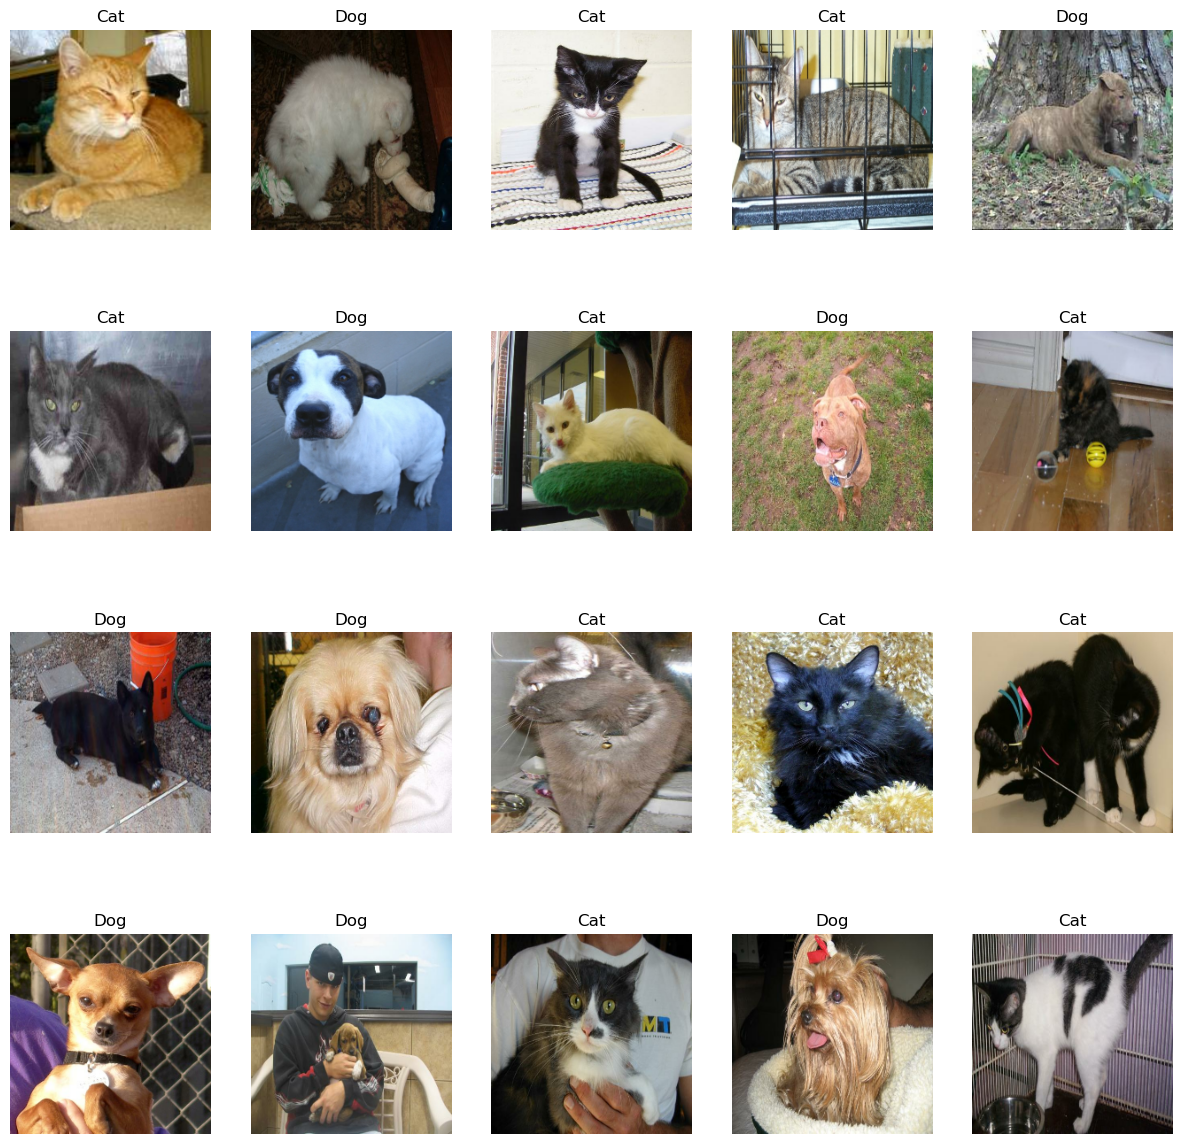

In [9]:
classname=data_train.class_names
plt.figure(figsize=(15,15))
for img, label in data_train.take(1):
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(classname[int(label[i])])
        plt.axis('off')
plt.show()


In [10]:
model=models.Sequential([
    layers.Rescaling(1./255,input_shape=(227,227,3)),

    layers.Conv2D(32,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(128,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

/home/chinghia/miniconda3/envs/ai_env/lib/python3.10/site-packages/keras/src/layers/preprocessing/data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 227, 227, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 225, 225, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 225, 225, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 110, 110, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 110, 110, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 53, 53, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,178,177 (42.64 MB)

 Trainable params: 11,177,729 (42.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.fit(
    data_train,
    epochs=1,
    # batch_size=64,
    validation_data=data_test
)

# from keras.callbacks import EarlyStopping

# # stop=EarlyStopping(
# #     monitor='val_loss',
# #     patience='5',
# #     restore_best_weights= True,
# # )  Ham dung lai tu dong

2025-12-19 00:36:03.531041: I external/local_xla/xla/service/service.cc:163] XLA service 0x7106a00037d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-19 00:36:03.531073: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-12-19 00:36:03.566853: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-19 00:36:03.884087: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91700
2025-12-19 00:36:03.983291: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-19 00:36:

  1/625 ━━━━━━━━━━━━━━━━━━━━ 1:47:35 10s/step - accuracy: 0.6250 - loss: 0.9722

I0000 00:00:1766079372.459490   13026 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 35/625 ━━━━━━━━━━━━━━━━━━━━ 38s 65ms/step - accuracy: 0.5528 - loss: 0.9305

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


117/625 ━━━━━━━━━━━━━━━━━━━━ 32s 64ms/step - accuracy: 0.5680 - loss: 0.8028

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


229/625 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.5939 - loss: 0.7403

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


255/625 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - accuracy: 0.5986 - loss: 0.7310

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


324/625 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.6099 - loss: 0.7106

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


408/625 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.6209 - loss: 0.6921

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


415/625 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.6217 - loss: 0.6907

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


422/625 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.6225 - loss: 0.6894

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


446/625 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.6252 - loss: 0.6852

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


518/625 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.6323 - loss: 0.6739

624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6412 - loss: 0.6597

2025-12-19 00:36:54.389734: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-19 00:36:55.191704: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1341', 24 bytes spill stores, 24 bytes spill loads

2025-12-19 00:36:55.202383: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1341', 28 bytes spill stores, 28 bytes spill loads



625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6413 - loss: 0.6596

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 88ms/step - accuracy: 0.6900 - loss: 0.5839 - val_accuracy: 0.6435 - val_loss: 0.6519


In [15]:
score=model.evaluate(data_test)

 84/157 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6326 - loss: 0.6622

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6435 - loss: 0.6519
